# Taylor Swift song analysis
#### In this notebook we will analyze metadata information from Spotify about all of Taylor Swift's albums. The goal is to gain an overview of how Taylor's songs have changed overtime, and identify if there are any key trends or outliers in her songs.
#### Data is retrieved from [kaggle](https://www.kaggle.com/datasets/marcnhwu/taylor-swift-songs-with-audio-features-in-spotify)

In [111]:
## Imports
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import ColumnDataSource, Range1d, HoverTool, Legend
from bokeh.models.widgets import Tabs, Panel
from bokeh.io import show
from bokeh.palettes import Category20b, Spectral, Plasma, Viridis, YlOrRd, PuOr, BuPu, BuGn, brewer, GnBu, PRGn, Inferno256, PuRd, RdPu, PiYG, RdYlGn, YlGnBu
from bokeh.io import reset_output, output_notebook
reset_output()
output_notebook()

Loading BokehJS ...

# Load and preprocess the data

**Load the Taylor Swift song dataset from Kaggle which was downloaded onto my computer as `TaylorSwiftSpotifyCorpus.csv`**

In [112]:
df = pd.read_csv('TaylorSwiftSpotifyCorpus.csv', index_col=0)
df

,artist,name,album,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature
1,Taylor Swift,Picture To Burn,Taylor Swift,2006-10-24,173066,64,0.658,0.1730,0.658,0.877,0.000000,0.0962,-2.098,0.0323,0.821,105.586,4
2,Taylor Swift,Our Song,Taylor Swift,2006-10-24,201106,68,0.668,0.1110,0.668,0.672,0.000000,0.3290,-4.931,0.0303,0.539,89.011,4
3,Taylor Swift,Should've Said No,Taylor Swift,2006-10-24,242200,61,0.476,0.0103,0.476,0.777,0.000000,0.1960,-3.771,0.0289,0.472,167.964,4
4,Taylor Swift,Tim McGraw,Taylor Swift,2006-10-24,232106,62,0.580,0.5750,0.580,0.491,0.000000,0.1210,-6.462,0.0251,0.425,76.009,4
5,Taylor Swift,A Place in this World,Taylor Swift,2006-10-24,199200,51,0.576,0.0510,0.576,0.777,0.000000,0.3200,-2.881,0.0324,0.428,115.028,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Taylor Swift,Mr. Perfectly Fine (Taylor’s Version) (From Th...,Fearless (Taylor's Version),2021-04-09,277591,79,0.660,0.1620,0.660,0.817,0.000000,0.0667,-6.269,0.0521,0.714,135.942,4
262,Taylor Swift,We Were Happy (Taylor’s Version) (From The Vault),Fearless (Taylor's Version),2021-04-09,244236,68,0.609,0.8490,0.609,0.373,0.000000,0.0779,-8.819,0.0263,0.130,106.007,4
263,Taylor Swift,That’s When (feat. Keith Urban) (Taylor’s Vers...,Fearless (Taylor's Version),2021-04-09,189495,71,0.588,0.2250,0.588,0.608,0.000000,0.0920,-7.062,0.0365,0.508,90.201,4
264,Taylor Swift,Don’t You (Taylor’s Version) (From The Vault),Fearless (Taylor's Version),2021-04-09,208608,69,0.563,0.5140,0.563,0.473,0.000012,0.1090,-11.548,0.0503,0.405,101.934,4


### We decide to only analyze songs from Taylor's main studio albums on Spotify, so we reduce the dataset to those 158 songs.
**We keep the following albums:**
1. Taylor Swift
2. Fearless Platinum Edition  - we choose use this rather than Fearless (Taylor's Version) so that we are uniform in exploring the original albums. 
3. Speak Now (Deluxe Edition)
4. Red (Deluxe Edition)
5. 1989 (Deluxe Edition)
6. reputation
7. Lover
8. folklore
9. evermore (deluxe version)

### Additional processing:
1. **We will strip away the (Taylor's Version) and (Deluxe Edition)s from the album titles to make all ensuing graphs easier to read.**
2. **We will strip (Taylor’s Version) (From The Vault) from the songs on the Fearless album to be more concise.**



In [113]:
# show the albums and number of songs on each
df.album.value_counts()

Fearless (Taylor's Version)                                                            26
Red (Deluxe Edition)                                                                   22
Speak Now (Deluxe Edition)                                                             20
Lover                                                                                  19
folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]    19
Fearless Platinum Edition                                                              18
evermore (deluxe version)                                                              17
Speak Now World Tour Live                                                              16
folklore                                                                               16
1989 (Deluxe Edition)                                                                  16
Taylor Swift                                                                           15
reputation

In [114]:
# filter the df for only the albums we want
albums_to_keep = ["Taylor Swift", "Fearless Platinum Edition", "Speak Now (Deluxe Edition)","Red (Deluxe Edition)",
                  "1989 (Deluxe Edition)", "reputation", "Lover", "folklore", "evermore (deluxe version)"]

df = df[df['album'].isin(albums_to_keep)]
df

,artist,name,album,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature
1,Taylor Swift,Picture To Burn,Taylor Swift,2006-10-24,173066,64,0.658,0.1730,0.658,0.877,0.000000,0.0962,-2.098,0.0323,0.821,105.586,4
2,Taylor Swift,Our Song,Taylor Swift,2006-10-24,201106,68,0.668,0.1110,0.668,0.672,0.000000,0.3290,-4.931,0.0303,0.539,89.011,4
3,Taylor Swift,Should've Said No,Taylor Swift,2006-10-24,242200,61,0.476,0.0103,0.476,0.777,0.000000,0.1960,-3.771,0.0289,0.472,167.964,4
4,Taylor Swift,Tim McGraw,Taylor Swift,2006-10-24,232106,62,0.580,0.5750,0.580,0.491,0.000000,0.1210,-6.462,0.0251,0.425,76.009,4
5,Taylor Swift,A Place in this World,Taylor Swift,2006-10-24,199200,51,0.576,0.0510,0.576,0.777,0.000000,0.3200,-2.881,0.0324,0.428,115.028,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Taylor Swift,marjorie,evermore (deluxe version),2021-01-07,257773,62,0.535,0.8760,0.535,0.561,0.000136,0.1150,-11.609,0.0484,0.287,96.103,4
235,Taylor Swift,closure,evermore (deluxe version),2021-01-07,180653,61,0.689,0.8350,0.689,0.704,0.000005,0.1340,-10.813,0.2450,0.920,151.884,5
236,Taylor Swift,evermore (feat. Bon Iver),evermore (deluxe version),2021-01-07,304106,63,0.390,0.9370,0.390,0.270,0.002270,0.1110,-10.673,0.0308,0.320,125.177,5
237,Taylor Swift,right where you left me - bonus track,evermore (deluxe version),2021-01-07,245026,70,0.581,0.7690,0.581,0.619,0.000106,0.1170,-6.524,0.0282,0.645,137.915,4


In [115]:
# strip the suffixes from the album names
df['album'][df['album']=="Fearless Platinum Edition"] = 'Fearless'
df['album'][df['album']=="Red (Deluxe Edition)"] = 'Red'
df['album'][df['album']=="Speak Now (Deluxe Edition)"] = 'Speak Now'
df['album'][df['album']=="evermore (deluxe version)"] = 'evermore'
df['album'][df['album']=="1989 (Deluxe Edition)"] = '1989'

df

,artist,name,album,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature
1,Taylor Swift,Picture To Burn,Taylor Swift,2006-10-24,173066,64,0.658,0.1730,0.658,0.877,0.000000,0.0962,-2.098,0.0323,0.821,105.586,4
2,Taylor Swift,Our Song,Taylor Swift,2006-10-24,201106,68,0.668,0.1110,0.668,0.672,0.000000,0.3290,-4.931,0.0303,0.539,89.011,4
3,Taylor Swift,Should've Said No,Taylor Swift,2006-10-24,242200,61,0.476,0.0103,0.476,0.777,0.000000,0.1960,-3.771,0.0289,0.472,167.964,4
4,Taylor Swift,Tim McGraw,Taylor Swift,2006-10-24,232106,62,0.580,0.5750,0.580,0.491,0.000000,0.1210,-6.462,0.0251,0.425,76.009,4
5,Taylor Swift,A Place in this World,Taylor Swift,2006-10-24,199200,51,0.576,0.0510,0.576,0.777,0.000000,0.3200,-2.881,0.0324,0.428,115.028,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Taylor Swift,marjorie,evermore,2021-01-07,257773,62,0.535,0.8760,0.535,0.561,0.000136,0.1150,-11.609,0.0484,0.287,96.103,4
235,Taylor Swift,closure,evermore,2021-01-07,180653,61,0.689,0.8350,0.689,0.704,0.000005,0.1340,-10.813,0.2450,0.920,151.884,5
236,Taylor Swift,evermore (feat. Bon Iver),evermore,2021-01-07,304106,63,0.390,0.9370,0.390,0.270,0.002270,0.1110,-10.673,0.0308,0.320,125.177,5
237,Taylor Swift,right where you left me - bonus track,evermore,2021-01-07,245026,70,0.581,0.7690,0.581,0.619,0.000106,0.1170,-6.524,0.0282,0.645,137.915,4


In [116]:
# make lists of colors to use for the color_disgrete_sequence argument
color_purd = list(PuRd[9])
color_prgn = list(PRGn[9])
color_piyg = list(PiYG[9])
color_bupu = list(BuPu[9])

In [117]:
## show the amount of songs per album
# first need to make a df with one row per album containing the number of songs.
df_song_count = pd.DataFrame(df.album.value_counts().reset_index())
df_song_count.columns = ['album', 'Songs']
df_song_count

# now plot
fig = px.bar(df_song_count, x="album", y="Songs", title="Number of songs per album", color='album', 
            template='plotly_dark', color_discrete_sequence=color_piyg) #, width=600, height=400)
fig.write_html('./images/number_songs_per_album.html')
fig.show()


In [118]:
# # show the amount of songs per album - pandas
# ax = df.album.value_counts().plot(kind='bar', color='lavender', edgecolor='indigo', linewidth=3,
#                              title="Number of songs per album", xlabel="Album", ylabel="Number of songs",
#                              figsize=(10,5),rot=0)
# plt.savefig('./images/number_songs_per_album.png')
# plt.show()


In [119]:
# strip the suffixes from song names
df['name'] = df['name'].str.replace(" \(Taylor’s Version\) \(From The Vault\)","") # /(From The Vault/)", "")

df.name

<ipython-input-119-3ab5a42c969e>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



1                            Picture To Burn
2                                   Our Song
3                          Should've Said No
4                                 Tim McGraw
5                      A Place in this World
                       ...                  
234                                 marjorie
235                                  closure
236                evermore (feat. Bon Iver)
237    right where you left me - bonus track
238            it’s time to go - bonus track
Name: name, Length: 158, dtype: object

**We can drop the `artist` and `time_signature` columns since they are not useful to us. We also will drop `danceability.1` since it is a duplicate.****

In [120]:
# drop the 2 unneeded columns
df = df.drop(['artist', 'time_signature', 'danceability.1'], axis=1)
df

,name,album,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
1,Picture To Burn,Taylor Swift,2006-10-24,173066,64,0.658,0.1730,0.877,0.000000,0.0962,-2.098,0.0323,0.821,105.586
2,Our Song,Taylor Swift,2006-10-24,201106,68,0.668,0.1110,0.672,0.000000,0.3290,-4.931,0.0303,0.539,89.011
3,Should've Said No,Taylor Swift,2006-10-24,242200,61,0.476,0.0103,0.777,0.000000,0.1960,-3.771,0.0289,0.472,167.964
4,Tim McGraw,Taylor Swift,2006-10-24,232106,62,0.580,0.5750,0.491,0.000000,0.1210,-6.462,0.0251,0.425,76.009
5,A Place in this World,Taylor Swift,2006-10-24,199200,51,0.576,0.0510,0.777,0.000000,0.3200,-2.881,0.0324,0.428,115.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,marjorie,evermore,2021-01-07,257773,62,0.535,0.8760,0.561,0.000136,0.1150,-11.609,0.0484,0.287,96.103
235,closure,evermore,2021-01-07,180653,61,0.689,0.8350,0.704,0.000005,0.1340,-10.813,0.2450,0.920,151.884
236,evermore (feat. Bon Iver),evermore,2021-01-07,304106,63,0.390,0.9370,0.270,0.002270,0.1110,-10.673,0.0308,0.320,125.177
237,right where you left me - bonus track,evermore,2021-01-07,245026,70,0.581,0.7690,0.619,0.000106,0.1170,-6.524,0.0282,0.645,137.915


In [121]:
df.dtypes

name                 object
album                object
release_date         object
length                int64
popularity            int64
danceability        float64
acousticness        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
valence             float64
tempo               float64
dtype: object

**Clean the release_date column to be a date, and update length to be in seconds rather than milliseconds then round to the nearest second value.**

In [122]:
df["release_date"] = pd.to_datetime(df["release_date"])
df["length"] = df["length"]/1000
df["length"] = df["length"].round().astype(int)
df

,name,album,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
1,Picture To Burn,Taylor Swift,2006-10-24,173,64,0.658,0.1730,0.877,0.000000,0.0962,-2.098,0.0323,0.821,105.586
2,Our Song,Taylor Swift,2006-10-24,201,68,0.668,0.1110,0.672,0.000000,0.3290,-4.931,0.0303,0.539,89.011
3,Should've Said No,Taylor Swift,2006-10-24,242,61,0.476,0.0103,0.777,0.000000,0.1960,-3.771,0.0289,0.472,167.964
4,Tim McGraw,Taylor Swift,2006-10-24,232,62,0.580,0.5750,0.491,0.000000,0.1210,-6.462,0.0251,0.425,76.009
5,A Place in this World,Taylor Swift,2006-10-24,199,51,0.576,0.0510,0.777,0.000000,0.3200,-2.881,0.0324,0.428,115.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,marjorie,evermore,2021-01-07,258,62,0.535,0.8760,0.561,0.000136,0.1150,-11.609,0.0484,0.287,96.103
235,closure,evermore,2021-01-07,181,61,0.689,0.8350,0.704,0.000005,0.1340,-10.813,0.2450,0.920,151.884
236,evermore (feat. Bon Iver),evermore,2021-01-07,304,63,0.390,0.9370,0.270,0.002270,0.1110,-10.673,0.0308,0.320,125.177
237,right where you left me - bonus track,evermore,2021-01-07,245,70,0.581,0.7690,0.619,0.000106,0.1170,-6.524,0.0282,0.645,137.915


## Data exploration

Now that the dataset has been processed, we can make some initial graphs to understand what the dataset looks like.

#### View distributions of data

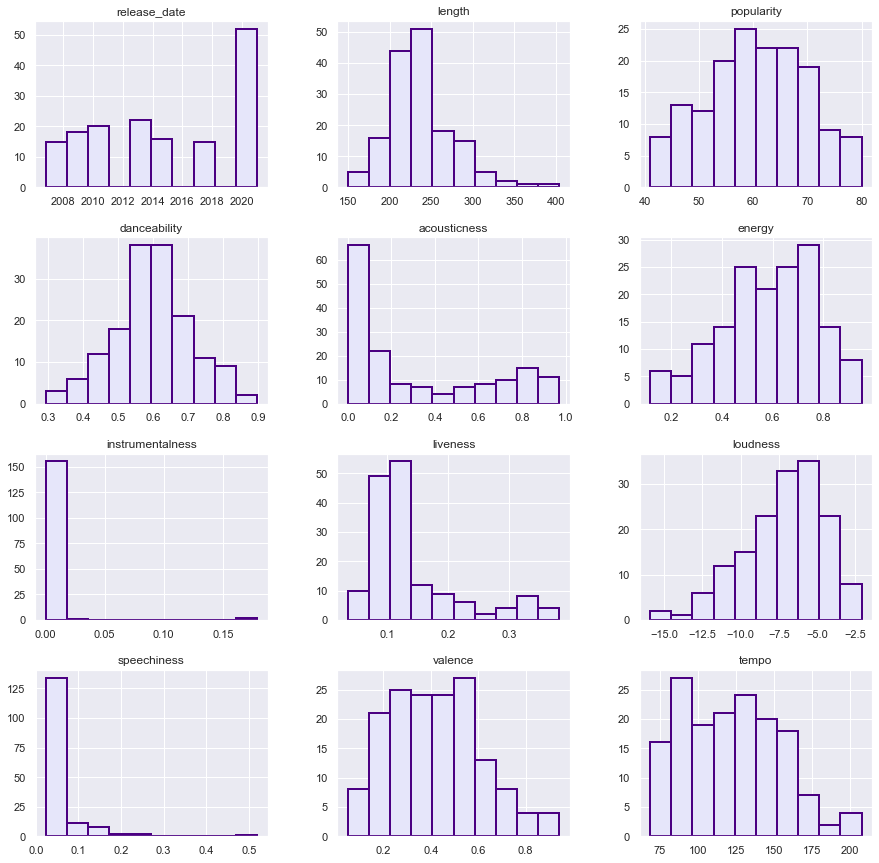

In [123]:
sns.set()
df.hist(figsize=(15,15), color='lavender', edgecolor='indigo', linewidth=2)
plt.show()


#### From looking at the distribution of all the features, we can identify a few key values.
1.  The `instrumentalness` and `speechiness` features are very skewed towards 0. These features do not seem that interesting or relevant to explore further due to this.
2. add others lol
3. She by far released the most songs in 2020, when two albums (folklore and evermore) were released.


**How do the features relate to one another?**

We start with scatter plots for all pairs of attributes, and then we show a correlation matrix.

In [124]:
## show scatter matrix
# first need to make sure we are only doing it for the float attributes
df_scatter = df.drop(['name', 'album', 'release_date'], axis=1)


fig = px.scatter_matrix(df_scatter, height=1000, title='Comparison of all song attributes')
fig.show()

# sns.pairplot(df) # if using seaborn

In [125]:
## same thing using pandas
# pd.plotting.scatter_matrix(df, figsize=(20,20), color='indigo');

The only two features that seem to have a strong positive correlation are loudness and energy. Let's look further with a correlation matrix.

In [126]:
# show correlation heatmap
corr = df.corr()
fig = px.imshow(corr, text_auto=".2f", color_continuous_scale='PuRd', width=700, height=700, title='Correlation between song features')
fig.update_xaxes(side="top", tickangle=30)
fig.write_html('./images/corr_matrix.html')
fig.show()

In [127]:
# # show correlation heatmap in sns
# # set sns fonts
# sns.set(font_scale=1.2)
# corr = df.corr()
# sns.set(rc = {'figure.figsize':(12,8)})
# sns.heatmap(corr, cmap="PuRd", annot=True, linecolor='black', linewidth=0.1)
# plt.xticks(rotation = 45)
# plt.title('Correlation between song attributes')
# plt.savefig('./images/corr_all_attributes.png')
# plt.show()

In [128]:
# show jitterplot to see distribution of each feature more closely
# columns_to_view = ['popularity','length','danceability','acousticness','energy','instrumentalness',
#                     'liveness','loudness','speechiness','valence','tempo']
# for column in columns_to_view:
#     sns.stripplot(x=df["popularity"])
#     plt.show()

**Show stripplots broken down by each album.**

<font color = red> DO WE WANT TO SEE STRIPPLOTS FOR ALL ALBUMS COMBINED?


# It would be nice to have these interactive and the user hovers over the point to see which song it actually is. Check how to do in Bokeh
</font>

In [129]:
# function to return a stripplot based on x, y, data, palette, and other sizing
def create_stripplot(x, y, data, jitter, palette, size, alpha, title, xlabel):
    sns.stripplot(x=x, y=y, data=data, jitter=jitter, palette=palette, size=size,
                    alpha=alpha) #, marker='s', linewidth=2, edgecolor='white')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()

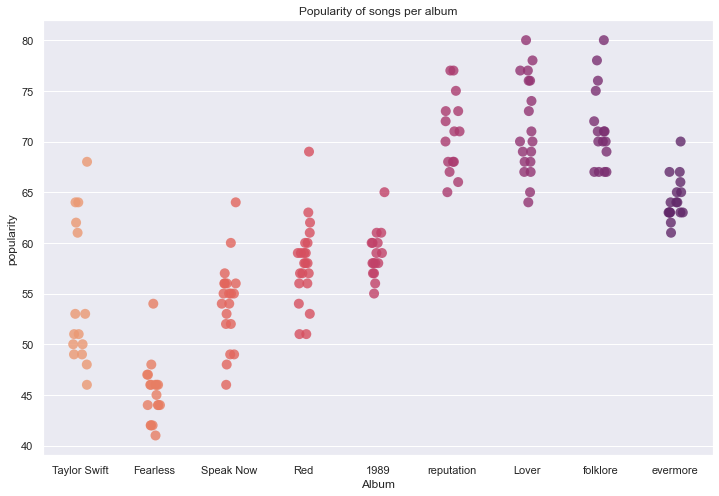

In [130]:
# create stripplot for popularity per album
create_stripplot("album", "popularity", df, 0.1, 'flare', 10, 0.8, 
                'Popularity of songs per album', 'Album')

In [131]:
# # create stripplot for acousticness per album
# create_stripplot("album", "acousticness", df, 0.1, 'flare', 10, 0.8, 
#                 'Acousticness of songs per album', 'Album')

# Try with px now to see if it's better

https://plotly.com/python/line-and-scatter/

In [132]:
# function to make a scatterplot in plotly express
def create_plotly_scatter_by_album(df, x, y, hover_data, color, color_discrete_sequence, title, template, size, symbol, width, linecolor):
    fig = px.scatter(df, x=x, y=y, hover_data=hover_data, color=color, opacity=0.8, 
                    color_discrete_sequence=color_discrete_sequence, title=title, template=template)
    # update default marker size and symbol
    fig.update_traces(marker=dict(size=size, symbol=symbol,
                                line=dict(width=width,
                                            color=linecolor)),
                                selector=dict(mode='markers'))

    fig.write_html('./images/'+title+'.html')
    fig.show()

In [133]:
# popularity scatter
create_plotly_scatter_by_album(df, "album", "popularity", ['name'], 'album', color_purd, 'Popularity of songs', 'plotly_white', 15, 'diamond', 1, 'DarkSlateGrey')

In [134]:
# acousticness scatter
create_plotly_scatter_by_album(df, "album", "acousticness", ['name'], 'album', color_purd, 'Acousticness of songs', 'plotly_white', 15, 'star', 1, 'DarkSlateGrey')

In [135]:
# length scatter
create_plotly_scatter_by_album(df, "album", "length", ['name'], 'album', color_prgn, 'Length of songs', 'plotly_dark', 15, 'diamond', 0.5, 'white')

In [136]:
# energy scatter
create_plotly_scatter_by_album(df, "album", "energy", ['name'], 'album', color_purd, 'Energy of songs', 'plotly_dark', 15, 'diamond', 0.5, 'white')

### Compare attributes against each other

In [137]:
## function to show scatterplot of 2 features, using different shapes based on album

def create_plotly_scatter_two_columns(df, x, y, hover_data, color, color_discrete_sequence, title, template, size, width, linecolor):
    fig = px.scatter(df, x=x, y=y, hover_data=['name'], color='album',
                    title=title, color_discrete_sequence=color_discrete_sequence,
                    template=template, opacity=0.7, symbol="album") #, size="energy")

    fig.update_traces(marker=dict(size=size,  #symbol='diamond',
                                    line=dict(width=width,
                                                color=linecolor)),
                                    selector=dict(mode='markers'))
    fig.write_html('./images/'+title+'.html')
    fig.show()


In [138]:
# energy and danceability
create_plotly_scatter_two_columns(df, "energy", "danceability", ['name'], 'album', color_bupu, 'Energy versus danceability', 'plotly_dark', 15, 0.5, 'white')

In [139]:
# energy and danceability
create_plotly_scatter_two_columns(df, "energy", "tempo", ['name'], 'album', color_purd, 'Energy versus tempo', 'plotly_dark', 15, 0.5, 'white')

In [140]:
# ## trying new things - scatterplot of 2 values, using shapes from album
# fig = px.scatter(df, x="energy", y="popularity", hover_data=['name'], color='album',
#                 title='Popularity compared to energy of songs', color_discrete_sequence=px.colors.qualitative.Prism,
#                 template='plotly', opacity=0.7, symbol="album") #, size="energy")

# fig.update_traces(marker=dict(size=15,  #symbol='diamond',
#                                 line=dict(width=1,
#                                             color='DarkSlateGrey')),
#                                 selector=dict(mode='markers'))
# fig.show()

In [141]:
# ## code to manually plot/save figures for testing new parameters
# fig = px.scatter(df, x="album", y="popularity", hover_data=['name'], color='album',
#                 title='Popularity of songs', color_discrete_sequence=color_prgn,
#                 template='plotly', opacity=0.7) #, size="energy")

# # update default marker size and symbol - https://stackoverflow.com/questions/65709221/set-all-markers-to-the-same-fixed-size-in-plotly-express-scatterplot
# fig.update_traces(marker=dict(size=15, symbol='diamond',
#                                 line=dict(width=1,
#                                             color='DarkSlateGrey')),
#                                 selector=dict(mode='markers'))

# # # fig.write_html("./images/popularity_scatter.html")
# fig.show()

### make everything nice in Bokeh (or plotly)
trending to see how things have changed over time

scatter plot matrix - done

corr heatmaps - could do some per album?

graphs to show top X popular, danceable, etc songs overall and per each album

how do different albums compare to each other

can we do some type of ML? nothing seems super interesting lol

